In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


| Variable|	Definition|	Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [317]:
data.shape

(891, 12)

# EDA

In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [319]:
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Сколько выжило

Text(0, 0.5, '')

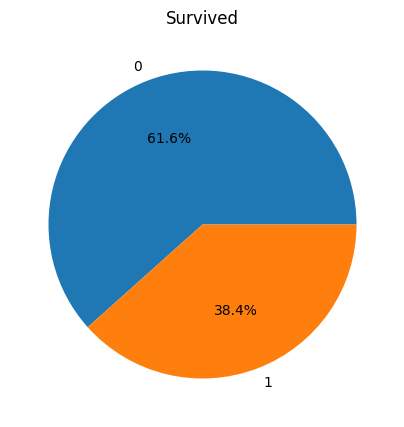

In [320]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_title('Survived')
ax.set_ylabel('')


### Кто выжил

In [321]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_6811/3950473678.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


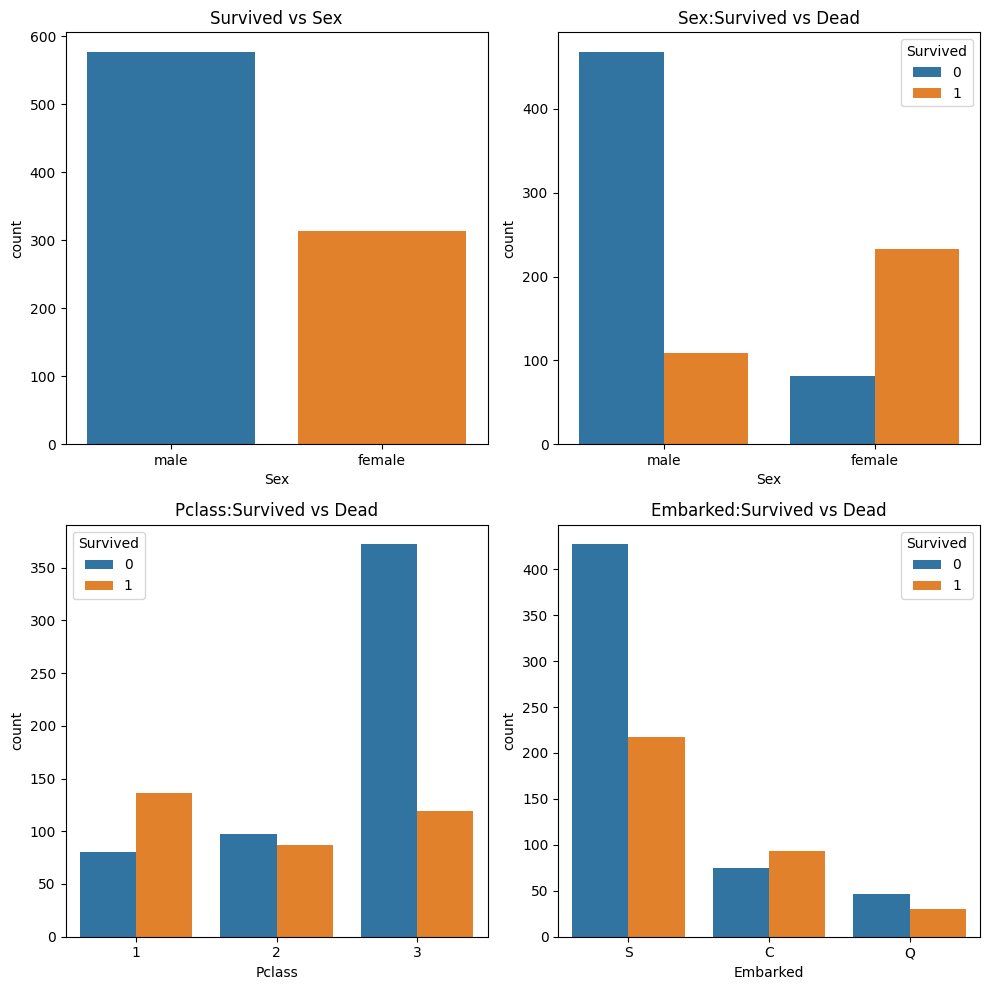

In [322]:
f, axes = plt.subplots(2, 2, figsize=(10,10))
sns.countplot(x='Sex', data=data, ax=axes[0][0])
axes[0][0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=data, ax=axes[0][1])
axes[0][1].set_title('Sex:Survived vs Dead')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[1][0])
axes[1][0].set_title('Pclass:Survived vs Dead')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=axes[1][1])
axes[1][1].set_title('Embarked:Survived vs Dead')

f.tight_layout()
f.show()

Наблюдения:
* Количество мужчин на титанике почти в 2 раза больше, чем количество женщин. 
* Тем не менее, количество выживших женщин почти в 2 раза выше, чем количество выживших мужчин
* Вероятность выжывания женщин ~75%, вероятность выживания мужчин ~19%
* Пол -- отличная фича для модели 

In [323]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Наблюдения:
* Пассажиры 1 класса выживают сильнее, чем пассажиры других классов

In [324]:
pd.crosstab([data['Sex'], data['Survived']],
             data['Pclass'], margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

Наблюдения: 
* Вероятность выживания женщины из первого класса ~96%, только 3 женщины из 1 класса погили
* Тем не менее, доля погибших мужчин из 1 класса намного выше
* Pclass -- тоже хорошая фича для модели


### Возраст

In [325]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,714.00,29.70,14.53,0.42,20.12,28.00,38.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


In [326]:
data.groupby(['Pclass'])['Age'].mean()

Pclass
1   38.23
2   29.88
3   25.14
Name: Age, dtype: float64

/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_6811/3688419486.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


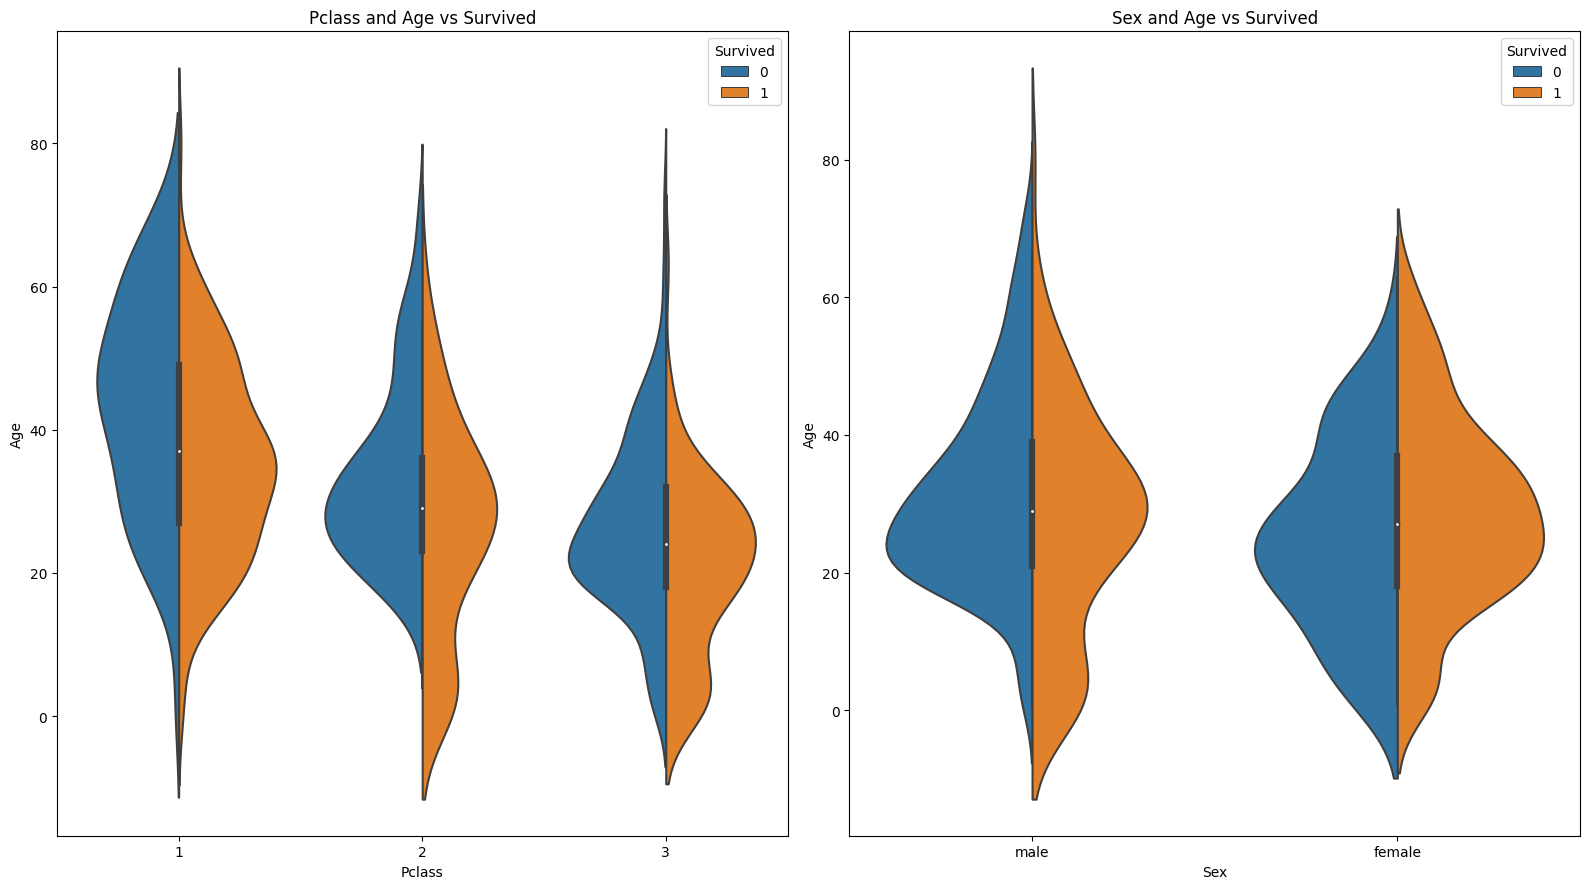

In [327]:
f, axes = plt.subplots(1, 2, figsize=(16,9))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=axes[0])
axes[0].set_title('Pclass and Age vs Survived')

sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=axes[1])
axes[1].set_title('Sex and Age vs Survived')
f.tight_layout()
f.show()

Наблюдения:
* Количество детей тем выше, чем ниже класс (3 класс -- самый низкий)
* Детей выживает больше, чем взрослых
* Вероятность выживания пассажиров с возрастом 20-50 высока. Вероятность выживания женщин 20-50 еще выше
* Для мужчин вероятность выживания падает с возрастанием возраста
* Фича Age имеет незаполненные значения

### Имена

In [328]:
# Выделим "титул" 
# Это Mr, Mrs и Miss etc.
data.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [329]:
data['title'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [330]:
pd.crosstab(data['title'], data['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [331]:
# Зареплейсим странные префиксы
strange_prefix_mapper = {
    'Mlle': 'Miss',
    'Mme': 'Miss',
    'Ms': 'Miss',
    
    'Dr': 'Mr',
    'Major': 'Mr',
    'Capt': 'Mr',
    'Sir': 'Mr',
    'Don': 'Mr',
    
    'Lady': 'Mrs',
    'Countess': 'Mrs',
    
    'Jonkheer': 'Other',
    'Col': 'Other',
    'Rev': 'Other',
}
data['title'].replace(strange_prefix_mapper, inplace=True)

In [332]:
data[data['Age'].isna()].groupby(['title']).size()

title
Master      4
Miss       36
Mr        120
Mrs        17
dtype: int64

Наблюдения:
* У мистеров больше всего неизвестен возраст
* Можем заполнить возраст согласно префиксу

In [333]:
data.groupby(['title'])['Age'].mean()

title
Master    4.57
Miss     21.86
Mr       32.74
Mrs      35.98
Other    45.89
Name: Age, dtype: float64

In [334]:
data.groupby(['title'])['Age'].median()

title
Master    3.50
Miss     21.50
Mr       30.00
Mrs      35.00
Other    51.00
Name: Age, dtype: float64

In [335]:
import re


title_regex = re.compile(r'([A-Za-z]+)\.')

age_mapper = data.groupby(['title'])['Age'].median().to_dict()

def fill_age(row):
    if pd.isna(row['Age']):
        prefix = title_regex.search(row['Name'])[1]
        corrected_prefix = strange_prefix_mapper.get(prefix, prefix)
        return age_mapper[corrected_prefix]
    else:
        return row['Age']

In [338]:
data['Age'] = data.apply(fill_age, axis=1)

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_6811/3425621792.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


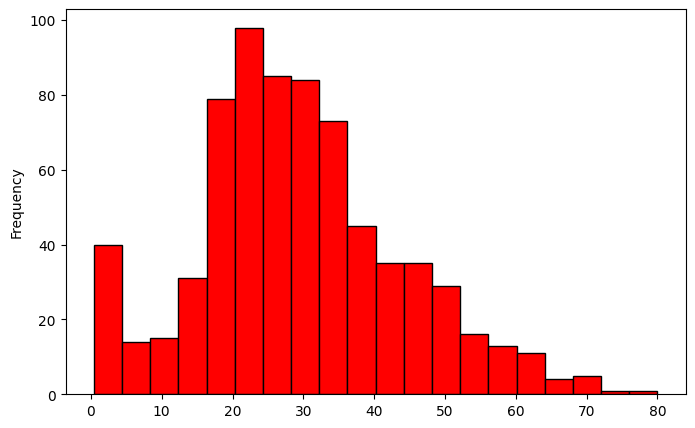

In [336]:
f, ax = plt.subplots(1, 1, figsize=(8,5))
data['Age'].plot.hist(ax=ax, bins=20, edgecolor='black', color='red')
f.show()

/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_6811/2596107500.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


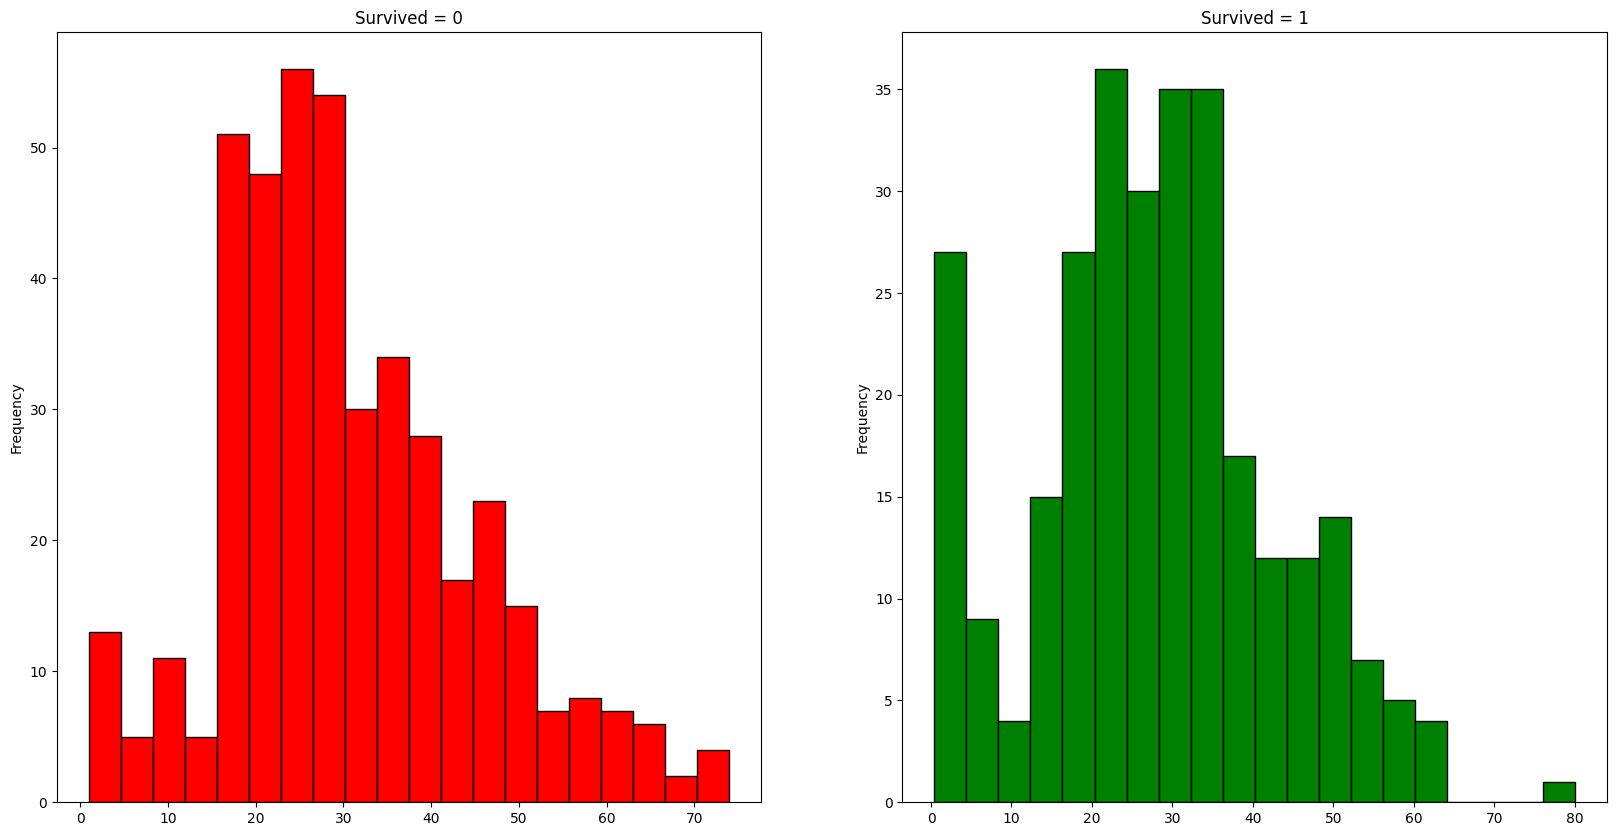

In [337]:
f, axes = plt.subplots(1, 2, figsize=(20,10))
data.loc[data['Survived'] == 0, 'Age'].plot.hist(ax=axes[0], bins=20, edgecolor='black', color='red')
axes[0].set_title('Survived = 0')

data.loc[data['Survived'] == 1, 'Age'].plot.hist(ax=axes[1], bins=20, edgecolor='black', color='green')
axes[1].set_title('Survived = 1')
f.show()

Наблюдения:
* Малыши (0-5) выжили в больших объемах (в первую очередь спасали женщин и детей)
* Самый возрастной пассажир (80 лет) выжил
* Максимальное кол-во погибших пришлось на группу 20-30. Это бьется с общим распределением пассажиров

### Embarked

In [340]:
pd.crosstab([data['Embarked'],data['Pclass']],
             [data['Sex'],data['Survived']],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_6811/1597623083.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


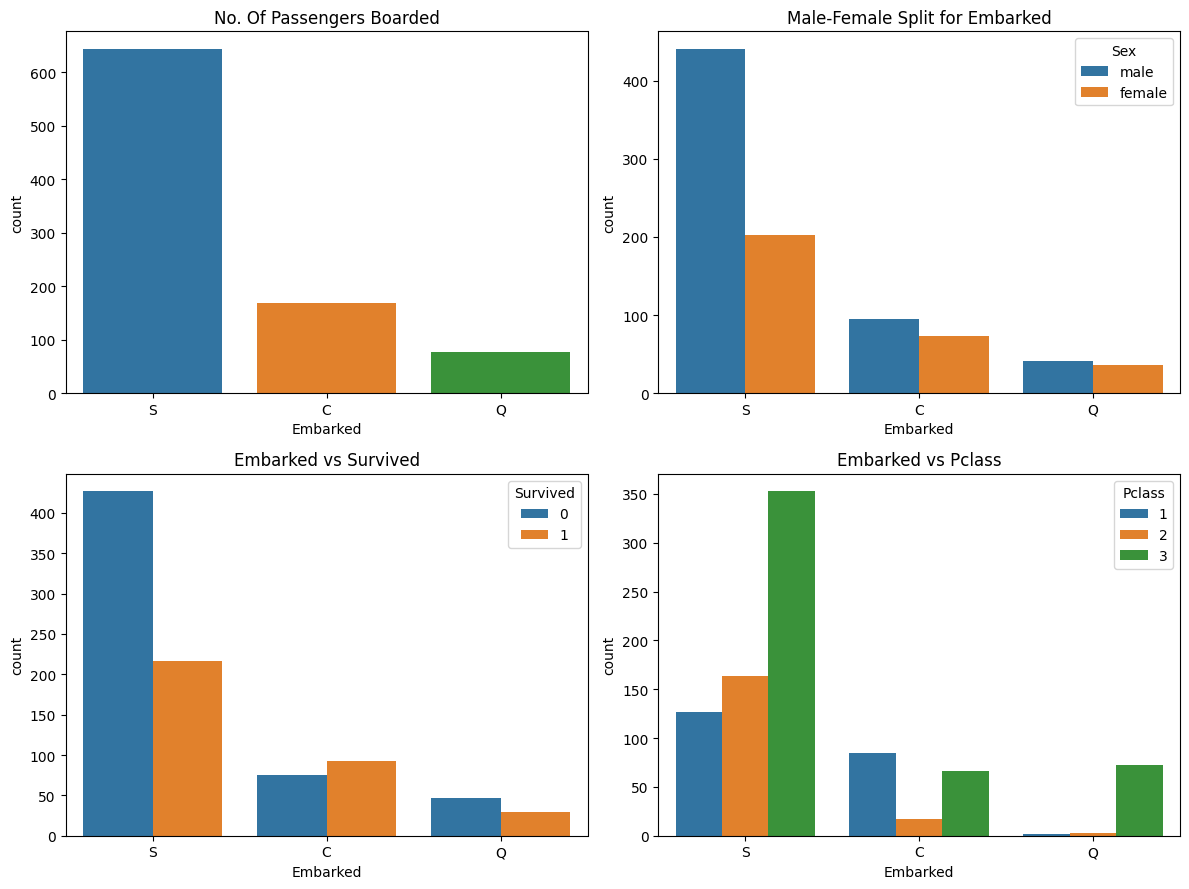

In [341]:
f, axes = plt.subplots(2, 2, figsize=(12,9))
sns.countplot(x='Embarked', data=data, ax=axes[0][0])
axes[0][0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked',hue='Sex',data=data,ax=axes[0][1])
axes[0][1].set_title('Male-Female Split for Embarked')

sns.countplot(x='Embarked',hue='Survived',data=data,ax=axes[1][0])
axes[1][0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked',hue='Pclass',data=data,ax=axes[1][1])
axes[1][1].set_title('Embarked vs Pclass')

f.tight_layout()
f.show()

Наблюдения:
* Максимальное число пассажиров сели в городе S. Большинство из них из 3 класса
* Пассажиры, севшие в C выжили в наиболльшей пропорции
* В городе Q сели пассажиры преимущественно из класса 3
* Фича Embarked имеет незаполненные значения

In [342]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [343]:
data['Embarked'] = data['Embarked'].fillna('S')

### SibSp

In [344]:
pd.crosstab([data['SibSp']], data['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

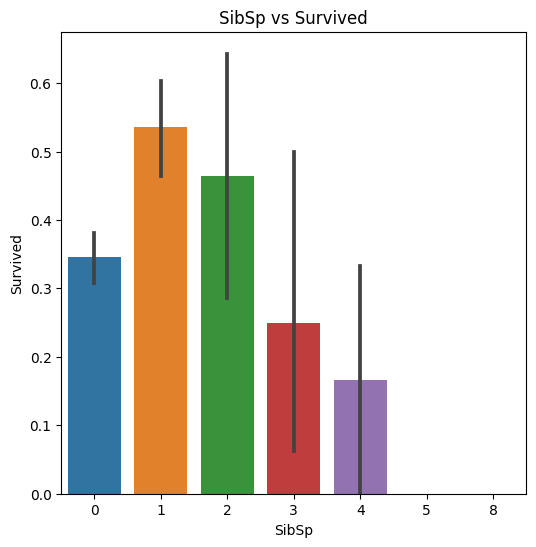

In [345]:
f, ax = plt.subplots(1, 1, figsize=(6,6))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax)
ax.set_title('SibSp vs Survived')

In [346]:
pd.crosstab(data['SibSp'], data['Pclass'])

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Наблюдения:
* Пассажиры, путешествующие в одиночку имеют шанс выжить (~35%). Далее, вероятность выживания уменьшается с увеличением количества членов семьи на борту
* Вероятность выживания семей из 5-8 человек равна нулю. Виной всему Pclass, т.к. все они путешествовали 3 классом

### Parch

In [347]:
pd.crosstab(data['Parch'], data['Pclass'])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs Survived')

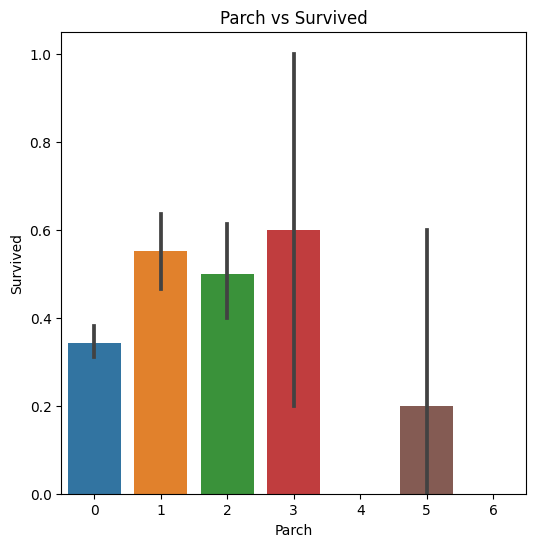

In [348]:
f, ax = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax)
ax.set_title('Parch vs Survived')

### Fare

In [148]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.00,446.00,257.35,1.00,223.50,446.00,668.50,891.00
Survived,891.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00
Pclass,891.00,2.31,0.84,1.00,2.00,3.00,3.00,3.00
Age,891.00,29.39,13.24,0.42,21.50,30.00,35.00,80.00
SibSp,891.00,0.52,1.10,0.00,0.00,0.00,1.00,8.00
Parch,891.00,0.38,0.81,0.00,0.00,0.00,0.00,6.00
Fare,891.00,32.20,49.69,0.00,7.91,14.45,31.00,512.33


/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_6811/2357842879.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


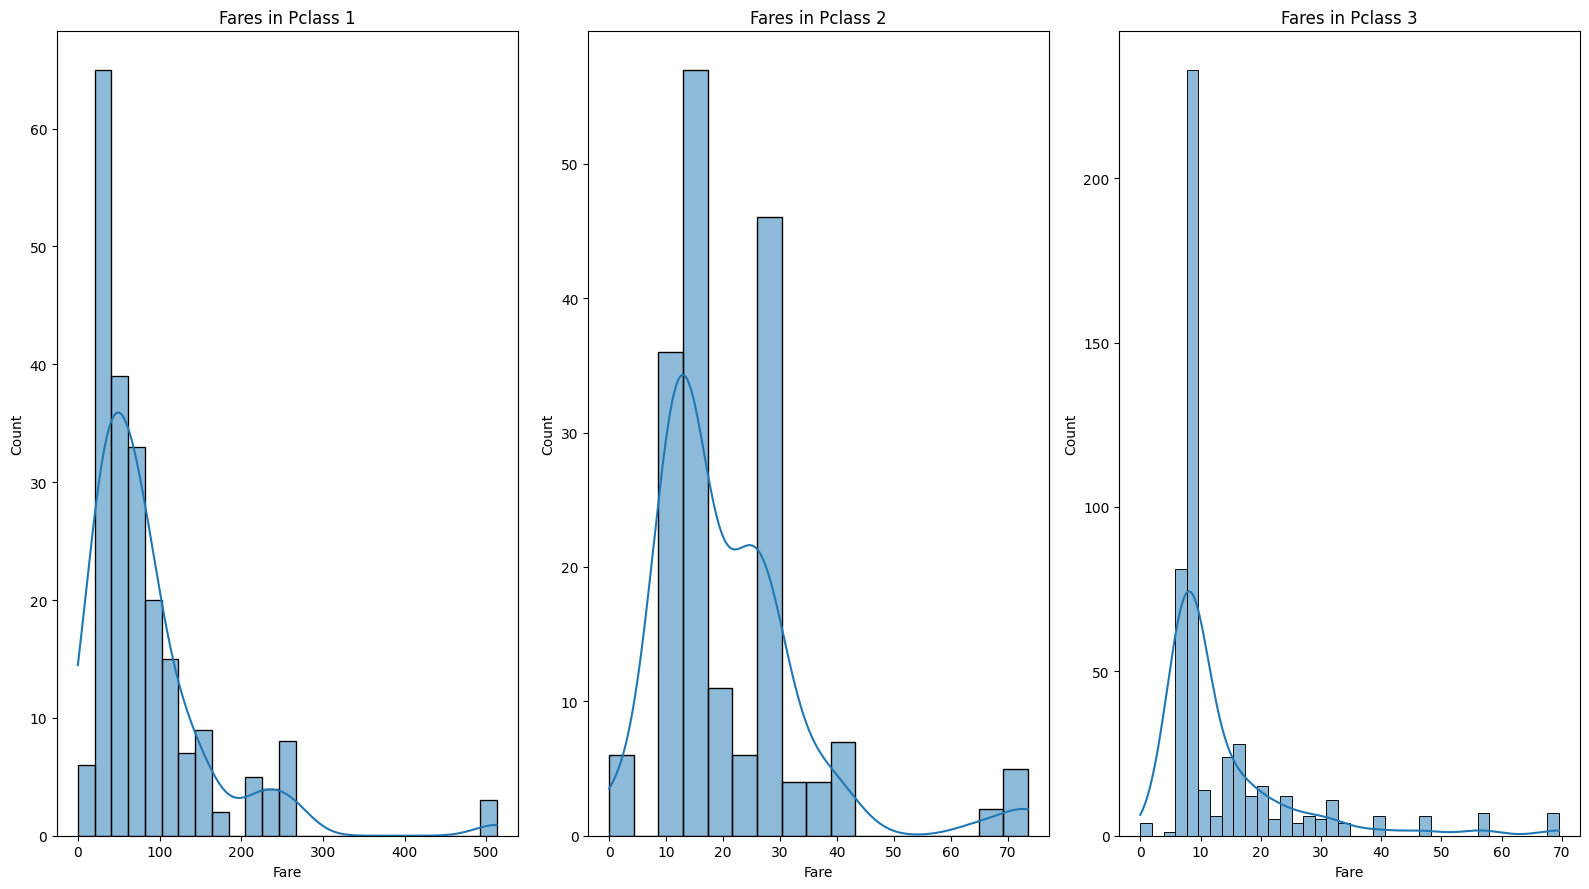

In [349]:
f, axes = plt.subplots(1, 3, figsize=(16, 9))

sns.histplot(data.loc[data['Pclass'] == 1, 'Fare'], ax=axes[0], kde=True)
axes[0].set_title('Fares in Pclass 1')

sns.histplot(data.loc[data['Pclass'] == 2, 'Fare'], ax=axes[1], kde=True)
axes[1].set_title('Fares in Pclass 2')

sns.histplot(data.loc[data['Pclass'] == 3, 'Fare'], ax=axes[2], kde=True)
axes[2].set_title('Fares in Pclass 3')
f.tight_layout()
f.show()

### Корреляция

In [351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


/var/folders/tx/gnc2s5cs6ws71smbc3fjwh480000gq/T/ipykernel_6811/63960196.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='RdYlGn', square=True)


<AxesSubplot: >

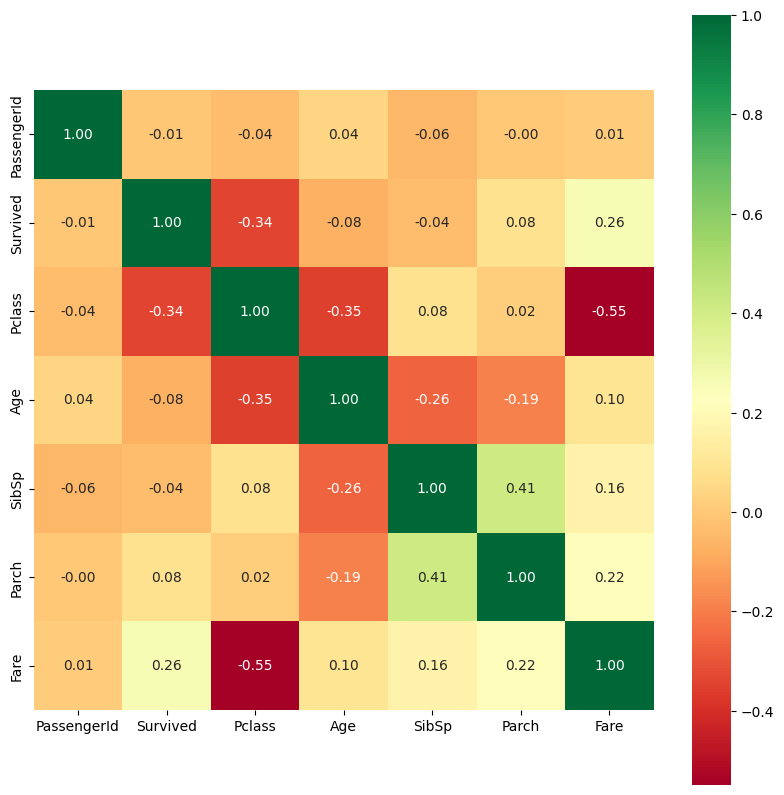

In [353]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='RdYlGn', square=True) 

# LogReg

In [354]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import precision_score, recall_score, f1_score, RocCurveDisplay, roc_auc_score

In [373]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [374]:
X = data[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [376]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 486 to 821
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    668 non-null    int64  
 1   Name      668 non-null    object 
 2   Sex       668 non-null    object 
 3   Age       537 non-null    float64
 4   SibSp     668 non-null    int64  
 5   Parch     668 non-null    int64  
 6   Fare      668 non-null    float64
 7   Embarked  666 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 47.0+ KB


In [377]:
import re


title_regex = re.compile(r'([A-Za-z]+)\.')

def extract_prefix(name):
    prefix = title_regex.search(name)[1]
    corrected_prefix = strange_prefix_mapper.get(prefix, prefix)
    return corrected_prefix

In [378]:
X_train['prefix'] = X_train['Name'].apply(extract_prefix)
X_test['prefix'] = X_test['Name'].apply(extract_prefix)

In [379]:
age_mapper = X_train.groupby(['prefix'])['Age'].median().to_dict() # !!!!!!!!!!!!!!!!!!!!!!!
# Извлекаем медианы ТОЛЬКО ДЛЯ ТРЕЙНА


def fill_age_by_prefix(row):
    if pd.isna(row['Age']):
        return age_mapper[row['prefix']]
    else:
        return row['Age']

In [380]:
age_mapper

{'Master': 3.0, 'Miss': 21.0, 'Mr': 30.0, 'Mrs': 35.0, 'Other': 52.5}

In [381]:
X_train['Age'] = X_train.apply(fill_age_by_prefix, axis=1)
X_test['Age'] = X_test.apply(fill_age_by_prefix, axis=1)

In [382]:
X_train.drop(columns=['Name'], inplace=True)

In [383]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,prefix
486,1,female,35.00,1,0,90.00,S,Mrs
238,2,male,19.00,0,0,10.50,S,Mr
722,2,male,34.00,0,0,13.00,S,Mr
184,3,female,4.00,0,2,22.02,S,Miss
56,2,female,21.00,0,0,10.50,S,Miss


In [406]:
trsf = ColumnTransformer([
    ('Scale', StandardScaler(), ['Age', 'Parch', 'SibSp', 'Fare']),
    ('OneHot', OneHotEncoder(drop='first', sparse=False), ['Pclass', 'Sex', 'Embarked', 'prefix']),
], remainder='passthrough')

In [407]:
pipe = Pipeline([
    ('transform', trsf),
    ('clf', LogisticRegression(class_weight='balanced'))
])

In [408]:
cv = KFold(n_splits=5)
scores = cross_val_score(pipe, X=X_train, y=y_train, cv=cv, verbose=9, scoring='roc_auc', n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [409]:
print(scores)
print(scores.mean())

[0.83745463 0.82256903 0.88103757 0.88853727 0.8877018 ]
0.8634600596922883


In [410]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale', StandardScaler(),
                                                  ['Age', 'Parch', 'SibSp',
                                                   'Fare']),
                                                 ('OneHot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'prefix'])])),
                ('clf', LogisticRegression(class_weight='balanced'))])

In [411]:
preds_train = pipe.predict(X_train)
preds_test = pipe.predict(X_test)

In [412]:
probas_train = pipe.predict_proba(X_train)[:, 1]
probas_test = pipe.predict_proba(X_test)[:, 1]

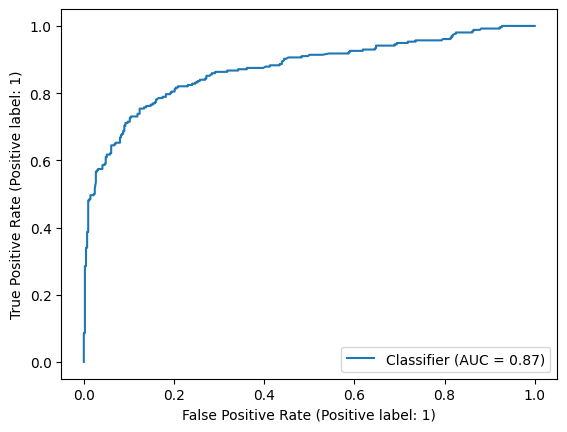

In [413]:
RocCurveDisplay.from_predictions(y_train, probas_train)

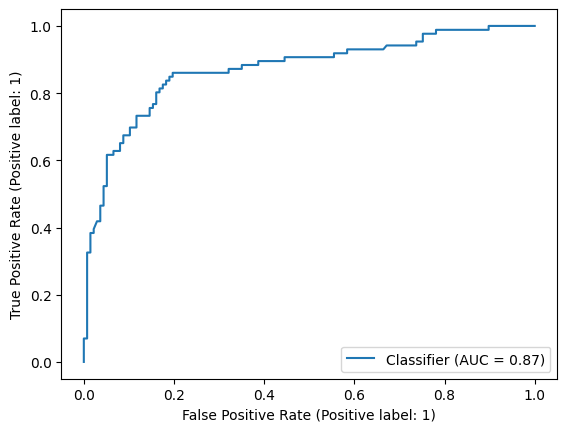

In [414]:
RocCurveDisplay.from_predictions(y_test, probas_test)

In [415]:
precision_train = precision_score(y_train, preds_train)
precision_test = precision_score(y_test, preds_test)

recall_train = recall_score(y_train, preds_train)
recall_test = recall_score(y_test, preds_test)

f1_train = f1_score(y_train, preds_train)
f1_test = f1_score(y_test, preds_test)

In [416]:
print(f'Precision:\n\tTrain: {precision_train:.4f}\n\tTest: {precision_test:.4f}')
print(f'Recall:\n\tTrain: {recall_train:.4f}\n\tTest: {recall_test:.4f}')
print(f'F1:\n\tTrain: {f1_train:.4f}\n\tTest: {f1_test:.4f}')

Precision:
	Train: 0.7390
	Test: 0.7396
Recall:
	Train: 0.7852
	Test: 0.8256
F1:
	Train: 0.7614
	Test: 0.7802
